## Desafio Codenation: Descubra as melhores notas de matemática do ENEM 2016
Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:

* matemática: 3
* ciências da natureza: 2
* linguagens e códigos: 1.5
* ciências humanas: 1
* redação: 3 
No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.
Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e IN_TREINEIRO.

Faça o upload do arquivo answer.csv usando o botão “Submeter resposta”.

## Carregando as bibliotecas


In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from pycaret.classification import *
import pycaret


/home/felipe/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Dados de treino:
df_train = pd.read_csv('train.csv')
# Dados de teste:
df_test = pd.read_csv('test.csv')

# Criando o dataframe de resposta:
answer = pd.DataFrame()

In [3]:
# Guardando o número da inscrição:
answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [4]:
df_train.drop(['NU_INSCRICAO'], axis=1, inplace=True)
df_test.drop(['NU_INSCRICAO'], axis=1, inplace=True)

In [5]:
cols = list(df_test)
cols.append('IN_TREINEIRO')

train = df_train[cols]
test = df_test

In [6]:
train.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO
0,43,RS,24,M,1,1,1,4,1,NaN,...,520.0,D,D,C,A,A,C,H,A,0
1,23,CE,17,F,3,1,2,0,2,1.0,...,580.0,A,A,B,A,A,A,NaN,A,0
2,23,CE,21,F,3,1,3,0,1,NaN,...,NaN,D,D,C,A,A,A,NaN,A,0
3,33,RJ,25,F,0,1,1,9,1,NaN,...,NaN,H,E,E,C,B,C,F,D,0
4,13,AM,28,M,2,1,1,4,1,NaN,...,NaN,E,D,C,A,A,B,F,A,0


In [7]:
test.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,43,RS,19,F,1,1,1,3,1,NaN,...,NaN,NaN,E,E,H,B,B,C,D,A
1,15,PA,24,M,3,2,1,4,1,NaN,...,NaN,NaN,B,C,B,A,A,C,D,A
2,29,BA,16,F,2,1,3,0,1,NaN,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,41,PR,17,F,1,1,2,0,2,1.0,...,40.0,480.0,E,E,E,C,B,B,C,A
4,53,DF,19,F,1,1,1,1,1,NaN,...,80.0,720.0,E,E,E,B,B,B,D,A


In [8]:
def info_data(df):
    '''Summary of some dataframe information.'''

    df = pd.DataFrame({'type': df.dtypes,
                       'amount': df.isna().sum(),
                       'percentage': (df.isna().sum() / df.shape[0]) * 100,
                       'unique': df.nunique()})
    return df

In [9]:
info_data(train)

,type,amount,percentage,unique
CO_UF_RESIDENCIA,int64,0,0.000000,27
SG_UF_RESIDENCIA,object,0,0.000000,27
NU_IDADE,int64,0,0.000000,55
TP_SEXO,object,0,0.000000,2
TP_COR_RACA,int64,0,0.000000,6
TP_NACIONALIDADE,int64,0,0.000000,5
TP_ST_CONCLUSAO,int64,0,0.000000,4
TP_ANO_CONCLUIU,int64,0,0.000000,11
TP_ESCOLA,int64,0,0.000000,4
TP_ENSINO,float64,9448,68.812819,3


In [10]:
train.shape, test.shape

((13730, 43), (4570, 42))

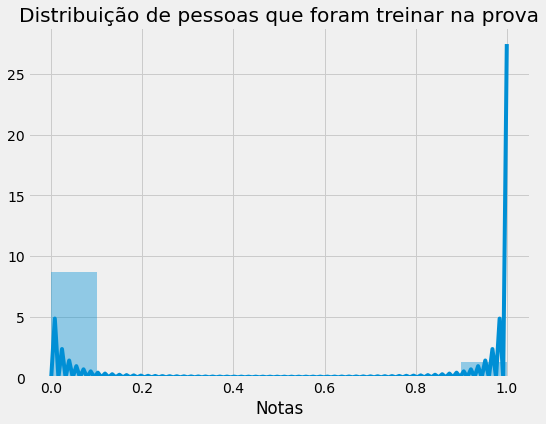

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
sns.distplot(train.IN_TREINEIRO, bins=10)
plt.xlabel('Notas')
plt.title('Distribuição de pessoas que foram treinar na prova');

Pela distribuição podemos notar que essa é uma variável binária. 

In [12]:
train['IN_TREINEIRO'].describe()

count    13730.000000
mean         0.129862
std          0.336163
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: IN_TREINEIRO, dtype: float64

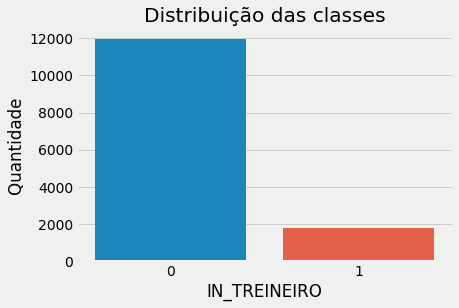

In [13]:
ax = sns.countplot(x='IN_TREINEIRO', data=train)
plt.ylabel('Quantidade')
plt.title('Distribuição das classes');

Nossa variável binária, está muito desbalanceada, ou seja, existem uma variável com a maioria das classificações e a outra variável com poucas classificações. Se rodassemos a classificação, provavelmente o algoritmo iria aprender muito bem a classificar o valor 0 (não treineiro) e iria ter dificuldade para classificar corretamente quem está fazendo o exame apenas para teste. 

## ESCOLHENDO AS VARIÁVEIS COM BASE NA CORRELAÇÃO

In [14]:
corr =  train.corr()
corr

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,...,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,IN_TREINEIRO
CO_UF_RESIDENCIA,1.000000,-0.002017,-0.234786,0.009433,0.025822,-0.032538,0.041406,0.018145,0.079229,0.001360,...,0.128479,-0.096473,-0.016955,0.069195,0.047746,0.050400,0.061881,0.043565,0.060629,-0.034944
NU_IDADE,-0.002017,1.000000,0.009675,-0.017713,-0.253403,0.681435,-0.296328,0.516253,-0.082980,0.027907,...,-0.024979,0.082065,0.055675,-0.102243,-0.114181,-0.104293,-0.110452,-0.086709,-0.116125,-0.295091
TP_COR_RACA,-0.234786,0.009675,1.000000,0.015761,0.000738,0.003942,-0.041713,0.040504,-0.172229,-0.014715,...,-0.168624,0.116860,0.020586,-0.097606,-0.090291,-0.096344,-0.102936,-0.091136,-0.107840,0.009676
TP_NACIONALIDADE,0.009433,-0.017713,0.015761,1.000000,-0.000054,-0.026154,0.024070,0.020522,-0.012981,0.009354,...,-0.049631,0.015266,0.005211,-0.031126,-0.030800,-0.027184,-0.031422,-0.025561,-0.032759,-0.015179
TP_ST_CONCLUSAO,0.025822,-0.253403,0.000738,-0.000054,1.000000,-0.592834,0.156222,NaN,NaN,0.018096,...,-0.117616,-0.025174,0.037078,-0.105647,-0.110186,-0.114245,-0.117711,-0.089861,-0.120580,0.533983
TP_ANO_CONCLUIU,-0.032538,0.681435,0.003942,-0.026154,-0.592834,1.000000,-0.422308,NaN,NaN,-0.000956,...,0.077917,0.061881,0.005578,0.027881,0.006023,0.011259,0.022018,0.003954,0.015097,-0.257710
TP_ESCOLA,0.041406,-0.296328,-0.041713,0.024070,0.156222,-0.422308,1.000000,-0.047195,0.975328,-0.007455,...,0.037254,-0.070008,-0.026380,0.059108,0.084441,0.079996,0.068909,0.071172,0.082520,-0.244562
TP_ENSINO,0.018145,0.516253,0.040504,0.020522,NaN,NaN,-0.047195,1.000000,-0.037207,0.017366,...,-0.092792,0.018257,0.040453,-0.088155,-0.115773,-0.107252,-0.114830,-0.103573,-0.119816,NaN
TP_DEPENDENCIA_ADM_ESC,0.079229,-0.082980,-0.172229,-0.012981,NaN,NaN,0.975328,-0.037207,1.000000,-0.033257,...,0.299387,-0.165051,-0.049705,0.233368,0.282586,0.282997,0.264291,0.252388,0.297040,NaN
IN_BAIXA_VISAO,0.001360,0.027907,-0.014715,0.009354,0.018096,-0.000956,-0.007455,0.017366,-0.033257,1.000000,...,0.000096,0.003828,0.029456,-0.027909,-0.018751,-0.020515,-0.023665,-0.013298,-0.022911,-0.013602


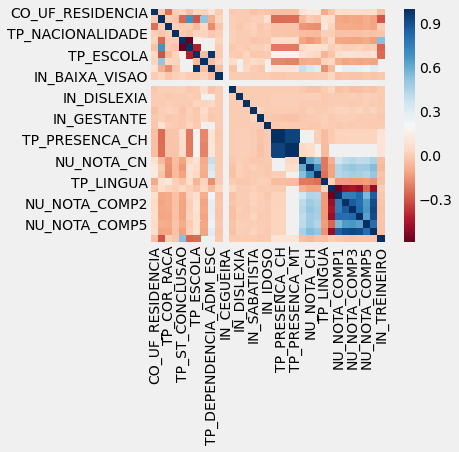

In [15]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=False);

In [17]:
train = train[['TP_PRESENCA_CN','TP_ST_CONCLUSAO','IN_TREINEIRO']]
test = test[['TP_PRESENCA_CN','TP_ST_CONCLUSAO']]

## Método SMOTE (Synthetic Minority Over-sampling Technique) e a criação de dados sintéticos.

Esse método é interessante, pois ele vai gerar dados sintéticos para equalizar a quantidade de classes 0 e 1. Mas como tudo é preciso ter cautela, pois se a quantidade de dados sintéticos gerados for muito alto, poderá ocorrer um overfitting. 
Neste caso, cerca de 15% dos nossos dados são da categoria 1. 


In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
smt = SMOTE()

In [20]:
target = train['IN_TREINEIRO']
type(target)

pandas.core.series.Series

In [21]:
train, target = smt.fit_sample(train, target)

In [22]:
np.bincount(target)

array([11947, 11947])

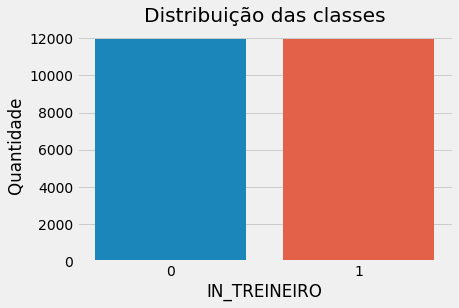

In [23]:
ax = sns.countplot(x=target)
plt.ylabel('Quantidade')
plt.title('Distribuição das classes');

In [24]:
target = pd.DataFrame({'IN_TREINEIRO':target.values})

In [25]:
train.head()

,TP_PRESENCA_CN,TP_ST_CONCLUSAO,IN_TREINEIRO
0,1,1,0
1,1,2,0
2,0,3,0
3,0,1,0
4,0,1,0


In [26]:
test.head()

,TP_PRESENCA_CN,TP_ST_CONCLUSAO
0,1,1
1,0,1
2,1,3
3,1,2
4,1,1


In [27]:
model = setup(data=train, target='IN_TREINEIRO',session_id=1991)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1991
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(23894, 3)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [29]:
classification = compare_models()

In [31]:
classification = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9803,0.9829,1.0,0.9621,0.9807,0.9605
1,0.9803,0.9832,1.0,0.9621,0.9807,0.9605
2,0.9821,0.9839,1.0,0.9654,0.9824,0.9641
3,0.9773,0.9853,1.0,0.9565,0.9778,0.9546
4,0.9683,0.9769,1.0,0.9404,0.9693,0.9366
5,0.9850,0.9866,1.0,0.9710,0.9853,0.9701
6,0.9815,0.9840,1.0,0.9642,0.9818,0.9629
7,0.9779,0.9826,1.0,0.9576,0.9783,0.9557
8,0.9779,0.9817,1.0,0.9576,0.9783,0.9557
9,0.9785,0.9819,1.0,0.9587,0.9789,0.9569


In [32]:
predict_model(classification);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.9763,0.98,1.0,0.9547,0.9768,0.9526


In [33]:
predictions = predict_model(classification, data = test)

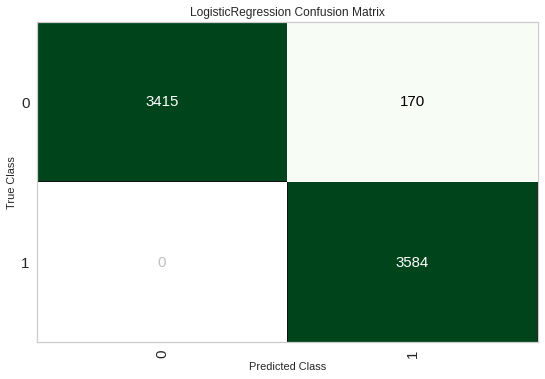

In [34]:
plot_model(estimator = classification, plot = 'confusion_matrix')

In [35]:
answer = pd.DataFrame({'NU_INSCRICAO':  answer['NU_INSCRICAO'],  'IN_TREINEIRO':predictions['Label']})
answer.sample(10)

,NU_INSCRICAO,IN_TREINEIRO
3154,813850b20b42800d9810debbe7be2a66bff6ecbf,0
4115,e090ab1c4025af389d164938e4df09b35a783a6d,0
1328,f43b96caa17ad196d338734e1781669cb29b205c,0
1287,e95276c2acfac8ad7d984a7f2696d50ac5e3f971,0
3973,f72b4091655dbf8dce34ed8715f4e6da41d468e1,0
2540,7aeb3cea5b9f19de528d0d613abce6718e9a869a,0
4559,1c4d5d329dd792c39e52de9547718d7bdb307ded,0
2695,1598e3a3528f61411dcaf68a7568357a121f7e34,1
1612,f9c04ba441393ea4e374effd82aeb477baceab26,0
4194,eebba14d08cd58ffcc571f0e2537cad6a36a86df,1


In [36]:
answer.to_csv('answer.csv',index=False,header=True)